In [529]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

from os.path import dirname, join
from PIL import Image

from skimage.transform import resize
from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

import pickle

In [531]:
PATH = './dataset'


In [532]:
from skimage import io, color
import numpy

In [533]:
lina_color = io.imread('C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal/8_left.jpg')

In [534]:
line_color_uni = io.imread('C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/glaucoma/43_right.jpg')

In [535]:
line_gray = color.rgb2gray(lina_color)
line_gray_uni = color.rgb2gray(line_color_uni)

In [536]:
line_gray.shape

(512, 512)

In [537]:
np.std(line_gray)

0.1582054251494933

In [538]:
np.std(line_gray_uni)

0.22385540608819313

In [539]:
line_gray[1,:]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [540]:
line_gray[2,1]


0.0

In [541]:
b = np.zeros((178, 140))


In [542]:
b[:,:-1] = line_gray


ValueError: could not broadcast input array from shape (512,512) into shape (178,139)

In [543]:

k1 = np.array([[ -2-3j, 1-10j,  +1 -3j],
                   [-1+4j, 1+ 1j, +8 +0j],
                   [ -3+3j, 1+10j,  +1 +3j]])

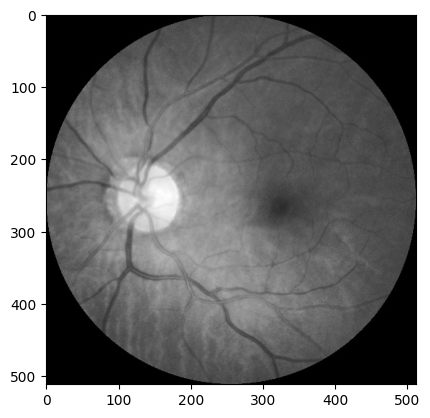

In [544]:
plt.imshow(np.absolute(line_gray), cmap = 'gray')

In [545]:
grad = convolve2d(line_gray, k1, boundary='symm', mode='same')


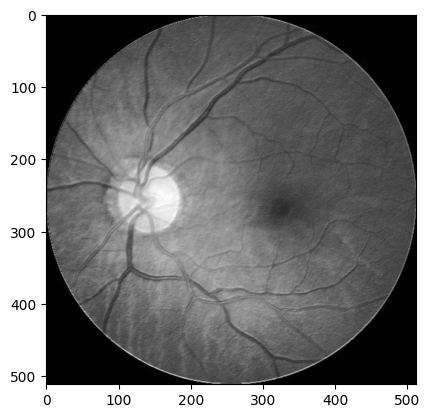

In [546]:
plt.imshow(np.absolute(grad), cmap='gray')


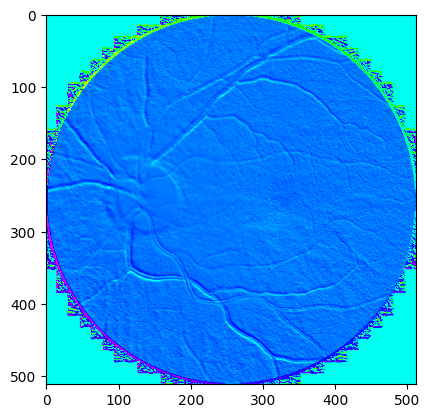

In [547]:
plt.imshow(np.angle(grad), cmap='hsv')


In [548]:
k2 = np.array([
    [1e-2,1e-2,1e-2],
    [2e-3,3e-3,3e-3],
    [0,0,0]
])

In [549]:
grad = convolve2d(line_gray, k2, boundary='symm', mode='same')


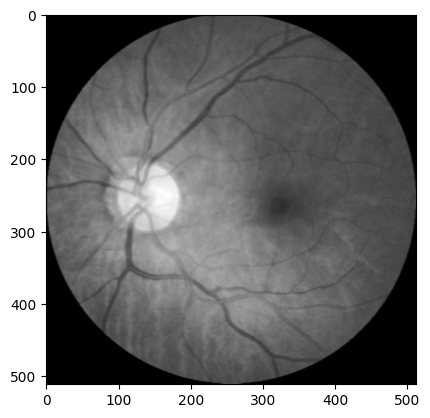

In [550]:
plt.imshow(np.absolute(grad), cmap='gray')


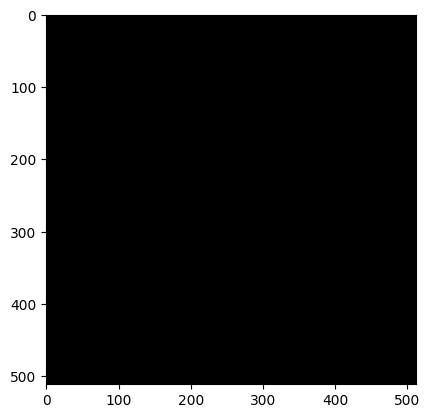

In [551]:
plt.imshow(np.angle(grad), cmap='gray')


In [552]:
k2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [553]:
grad = convolve2d(line_gray, k2, boundary='symm', mode='same')


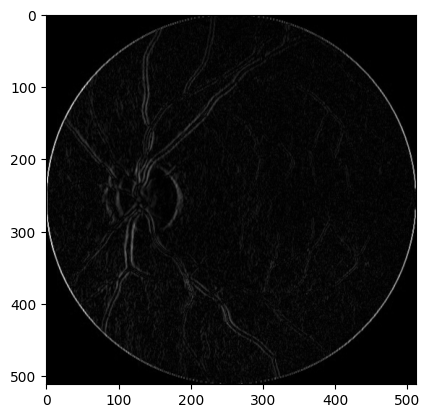

In [554]:
plt.imshow(np.absolute(grad), cmap='gray')


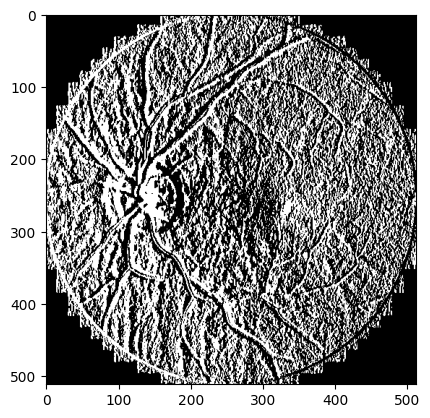

In [555]:
plt.imshow(np.angle(grad), cmap='gray')


In [556]:

k3 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

In [557]:
grad = convolve2d(line_gray, k3, mode='same')

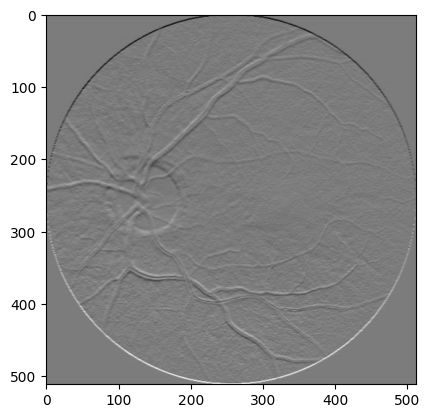

In [558]:
plt.imshow(grad, cmap='gray')

In [559]:

k4 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [560]:
grad1 = convolve2d(line_gray, k3, mode='same')
grad2 = convolve2d(line_gray, k4, mode='same')

In [561]:
grad = np.sqrt(grad1**2 + grad2**2)

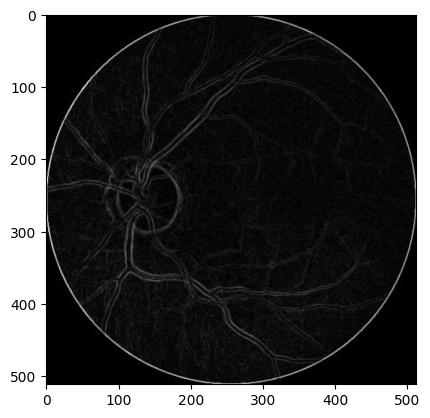

In [562]:
plt.imshow(np.absolute(grad), cmap='gray')


In [563]:
grad = np.arctan(grad2/grad1)


C:\Users\shikh\AppData\Local\Temp\ipykernel_45940\514024707.py:1: RuntimeWarning: divide by zero encountered in divide
  grad = np.arctan(grad2/grad1)
C:\Users\shikh\AppData\Local\Temp\ipykernel_45940\514024707.py:1: RuntimeWarning: invalid value encountered in divide
  grad = np.arctan(grad2/grad1)


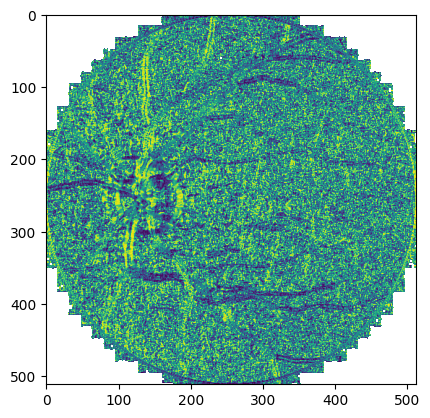

In [564]:
plt.imshow(np.absolute(grad))


In [565]:
s1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
s2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

In [566]:
grad1 = convolve2d(line_gray, s1, mode='same')

In [567]:
grad2= convolve2d(line_gray,s2, mode='same')

In [568]:
grad= np.sqrt(grad1**2, grad**2)

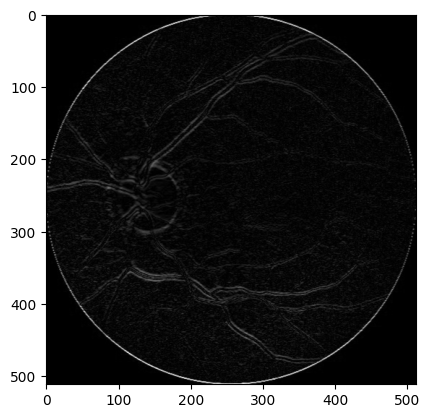

In [569]:
plt.imshow(grad, cmap='gray')

In [570]:
for x in range(len(line_gray)):
    grad = convolve2d(line_gray[x:,], k3, mode='same')
    plt.axis('off')
    plt.imshow(grad, cmap='gray')

In [571]:
grad


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [572]:
line_gray[x].shape


(512,)

In [573]:
from numpy import newaxis


In [574]:
one = line_gray[newaxis, : , :]


In [575]:
one.shape

(1, 512, 512)

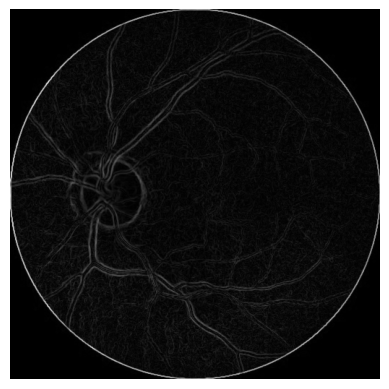

In [576]:
for x in range(len(one)):
    grad1 = convolve2d(one[x,:,:], s1, mode='same')
    grad2 = convolve2d(one[x,:,:], s2, mode='same')

    grad = np.sqrt(grad1**2 + grad2**2)
#     grad = np.arctan(grad2/grad1)
    plt.axis('off')
    plt.imshow(grad, cmap='gray')

C:\Users\shikh\AppData\Local\Temp\ipykernel_45940\958727432.py:4: RuntimeWarning: Got image with third dimension of 512. This image will be interpreted as a multichannel 2d image, which may not be intended.
  segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=5)


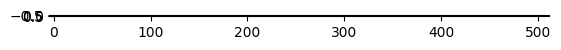

In [577]:

from skimage.segmentation import felzenszwalb
from skimage.data import coffee
img = one
segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=5)
plt.imshow(segments)

from skimage.future import graph
from skimage import data, segmentation, color, filters, io

gimg = color.rgb2gray(line_gray)


show(gimg)


lables = segmentation.slic(line_gray, compactness=30, n_segments=20)
edges = filters.sobel(line_gray)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(lables, edges)
lc = graph.show_rag(lables, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2)
plt.colorbar(lc, fraction=0.03)
io.show()

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from os.path import dirname, join
from PIL import Image

from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

In [10]:

import cv2


In [11]:
PATH = 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal'

In [12]:
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".jpg" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
lstFilesDCM

['C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1034_left.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1034_right.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1060_left.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1060_right.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1253_left.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1253_right.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\2329_left.jpg',
 'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\2329_right.jpg',
 'C:

In [13]:
print(len(lstFilesDCM))

1074


In [14]:
dcm_500 = []
for img in range(len(lstFilesDCM)):
    dcm_500.append(lstFilesDCM[img])

In [15]:
len(dcm_500)


1074

In [16]:
dcm_500[1]

'C:/Users/shikh/OneDrive - The University of Western Ontario/Desktop/Codes/CS4442B/Project/dataset/normal\\1034_right.jpg'

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [19]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])



In [20]:
dcm_np = []
pat_ids = []
for dcm in dcm_500:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mpimg.imread(dcm)
    img = rgb2gray(img)
    img = np.array(img)
    dcm_np.append(img)

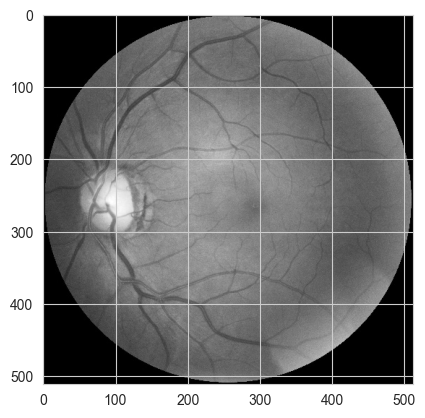

In [93]:
plt.imshow(dcm_np[2],cmap='gray')

In [22]:
#temp.flatten()

In [23]:
pat_ids

['shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',
 'shikh',


In [24]:

from skimage.measure import shannon_entropy
from skimage import io, color, img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics.cluster import entropy

In [25]:

def s_entropy(dcm):
    return shannon_entropy(dcm)

def entropy_simple(dcm):
    return entropy(dcm)

class glcm:
    def __init__(self, image):
        distance = [1, 2, 3]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        self.image = img_as_ubyte(image.astype('int64'))
        self.glcm_mat = graycomatrix(self.image, distances = distance, angles = angles, symmetric = True, normed = True)
        self.properties = ['correlation', 'homogeneity', 'contrast', 'energy']

    def correlation(self):
        return graycoprops(self.glcm_mat, 'correlation').flatten()

    def homogeneity(self):
        return graycoprops(self.glcm_mat, 'homogeneity').flatten()

    def contrast(self):
        return graycoprops(self.glcm_mat, 'contrast').flatten()

    def energy(self):
        return graycoprops(self.glcm_mat, 'energy').flatten()

    def glcm_all(self):
        return np.hstack([graycoprops(self.glcm_mat, props).ravel() for props in self.properties])

In [26]:

def mean_from_list(listname):
    listname = pd.Series(listname).fillna(0).tolist()
    counts = 0
    total = 0
    for e in listname:
        if e != 0:
            counts = counts + 1
            total = total + e
    return total/counts

In [27]:
import math
from skimage.measure import label, regionprops

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

import statistics

In [28]:
class region_props:
    def __init__(self, image):
        self.image = image
        self.thresh = threshold_otsu(self.image)
        self.bw = closing(self.image > self.thresh, square(3))
        self.bw_clear = clear_border(self.bw)
        self.bw_label = label(self.bw_clear)
        self.regions = regionprops(self.bw_label)
#         self.idx = 0

    def thresh_img(self):
        return self.thresh

In [29]:
def sd_area(line_gray):
        lista = []
        for e in line_gray:
            lista.append(e)
        return lista

sd_area(line_gray)

np.std(line_gray)

In [32]:
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

def water_seg(image, footprint = np.ones((3,3))):
    distance = ndi.distance_transform_edt(image)
    local_maxi = peak_local_max(distance, indices=False, footprint=footprint, labels=image)
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask = image)
    plt.imshow(labels, cmap=plt.cm.gray)

In [33]:
class moments:

    def __init__(self, image):
        self.image = image
        self.moment = cv2.moments(self.image)
        self.hu = cv2.HuMoments(self.moment)

    def get_moments(self):
#         keys = [key for key in self.moment.keys()]
        values = [value for value in self.moment.values()]
        return values

    def get_HuMoments(self):
        moments_hu = []
        for m in range(len(self.hu)):
            moments_hu.append(self.hu[m][0])
        return moments_hu

In [34]:
xx = dict()
for dc in range(len(dcm)):
    xx[dc] = [entropy_simple(dcm_np[dc])]

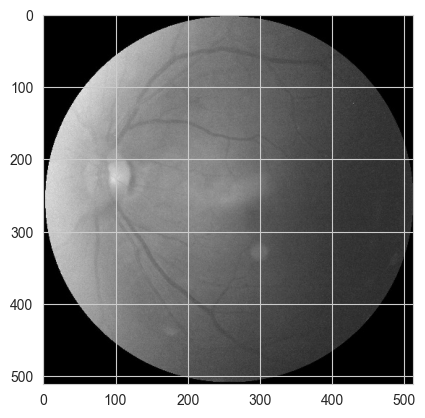

In [35]:
plt.imshow(dcm_np[10],cmap='gray')


In [36]:
xx[10]

[7.566543563742849]

In [37]:
for dc in dcm_np:
    print(len(dc.shape))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [38]:
glcm(dcm_np[10]).correlation()

C:\Users\shikh\OneDrive - The University of Western Ontario\Desktop\Codes\my_venv1\lib\site-packages\skimage\util\dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 196 fits in uint8
  return _convert(image, np.uint8, force_copy)


array([0.98641433, 0.98223158, 0.98890852, 0.98470887, 0.97562095,
       0.98223158, 0.98038689, 0.98470887, 0.96462637, 0.96733635,
       0.97192987, 0.97241525])

In [39]:
data_500 = dict()

for dc in range(len(dcm_np)):
    if (len(dcm_np[dc].shape) == 2):
        data_500[dc] = [s_entropy(dcm_np[dc]), entropy_simple(dcm_np[dc]), moments(dcm_np[dc]).get_moments(), moments(dcm_np[dc]).get_HuMoments(),


                        region_props(dcm_np[dc]).thresh_img(), glcm(dcm_np[dc]).correlation(), glcm(dcm_np[dc]).homogeneity(),
                        glcm(dcm_np[dc]).contrast(), glcm(dcm_np[dc]).energy()
                        ]

C:\Users\shikh\OneDrive - The University of Western Ontario\Desktop\Codes\my_venv1\lib\site-packages\skimage\util\dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 245 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\shikh\OneDrive - The University of Western Ontario\Desktop\Codes\my_venv1\lib\site-packages\skimage\util\dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 235 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\shikh\OneDrive - The University of Western Ontario\Desktop\Codes\my_venv1\lib\site-packages\skimage\util\dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 252 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\shikh\OneDrive - The University of Western Ontario\Desktop\Codes\my_venv1\lib\site-packages\skimage\util\dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max val

In [40]:
data_500

{0: [10.722302286483549,
  7.432133598987527,
  [20410949.56430001,
   4950180802.261,
   5135899866.2566,
   1500722316043.757,
   1259411932443.7256,
   1596859135185.9495,
   515203574562067.5,
   385484100684496.9,
   398017745974367.1,
   556633098433217.8,
   300176016231.5796,
   13823977792.868164,
   304539669444.36743,
   5638947432057.625,
   1159897809581.5,
   3781380784289.203,
   1564404628476.5,
   0.0007205258566953494,
   3.318230939029943e-05,
   0.0007310001277878132,
   2.9959876726572962e-06,
   6.162567714840975e-07,
   2.009057603720158e-06,
   8.311723133502187e-07],
  [0.0014515259844831625,
   4.513972980812639e-09,
   1.0223589035729464e-11,
   2.714552917421257e-11,
   -1.7708804139863848e-22,
   7.21108705192179e-16,
   4.161035732527712e-22],
  50.2711083984375,
  array([0.99368083, 0.98992006, 0.99384383, 0.99128738, 0.9861598 ,
         0.98992006, 0.98653593, 0.99128738, 0.97869599, 0.97873665,
         0.97939417, 0.98168863]),
  array([0.52291461, 0.

In [41]:
d_vals = [d for d in data_500.values()]


In [42]:
d_vals[0][0], d_vals[0][1] # s_entropy, entropy


(10.722302286483549, 7.432133598987527)

In [43]:
d_vals[0][2], d_vals[0][3] # moments, humoments


([20410949.56430001,
  4950180802.261,
  5135899866.2566,
  1500722316043.757,
  1259411932443.7256,
  1596859135185.9495,
  515203574562067.5,
  385484100684496.9,
  398017745974367.1,
  556633098433217.8,
  300176016231.5796,
  13823977792.868164,
  304539669444.36743,
  5638947432057.625,
  1159897809581.5,
  3781380784289.203,
  1564404628476.5,
  0.0007205258566953494,
  3.318230939029943e-05,
  0.0007310001277878132,
  2.9959876726572962e-06,
  6.162567714840975e-07,
  2.009057603720158e-06,
  8.311723133502187e-07],
 [0.0014515259844831625,
  4.513972980812639e-09,
  1.0223589035729464e-11,
  2.714552917421257e-11,
  -1.7708804139863848e-22,
  7.21108705192179e-16,
  4.161035732527712e-22])

In [44]:
from numpy import array


x = array(d_vals[1])


x


pd.DataFrame(x)


In [48]:
pd.DataFrame(data_500).T.head()


0         1                                                  2  \
0  10.722302  7.432134  [20410949.56430001, 4950180802.261, 5135899866...   
1  10.632939  7.370192  [20551314.095800005, 5564024065.922104, 514405...   
2  12.124822  8.404286  [21896091.2466, 5628394612.7265005, 5574905112...   
3  12.215748  8.467311  [21697587.110099994, 5940791417.510495, 547462...   
4  12.822273  8.887722  [27291242.83749999, 7059682053.142897, 7819842...   

                                                   3          4  \
0  [0.0014515259844831625, 4.513972980812639e-09,...  50.271108   
1  [0.0014248158173354925, 5.858084228372953e-10,...  51.151705   
2  [0.0013741166823531897, 1.244588094736413e-09,...  54.687356   
3  [0.0013515901550537435, 1.7215659543513903e-09...  53.127483   
4  [0.0011755470701712723, 2.558210559305316e-08,...  84.243718   

                                                   5  \
0  [0.9936808331516439, 0.9899200586814485, 0.993...   
1  [0.9932708748028752, 0.990526397377687, 0.9941...   
2  [0.9843706534189343, 0.9778966609874699, 0.983...   
3  [0.9862637853562326, 0.9818427252635468, 0.985...   
4  [0.9910394956880587, 0.9846563372528194, 0.990...   

                                                   6  \
0  [0.5229146123512534, 0.47353913960915106, 0.52...   
1  [0.5466435360466138, 0.49382443726955944, 0.55...   
2  [0.3454529545991345, 0.3370958092488719, 0.343...   
3  [0.34285984760881877, 0.3341906608592198, 0.34...   
4  [0.4888556435301148, 0.4414779595900336, 0.498...   

                                                   7  \
0  [28.491789995106412, 45.29996055468327, 27.756...   
1  [30.12771373532137, 42.27203863342927, 26.0734...   
2  [77.81422379524786, 109.66279617494916, 84.183...   
3  [71.1186704990145, 93.70902761554542, 75.61457...   
4  [90.56550804182442, 154.7371831449768, 95.5948...   

                                                   8  
0  [0.20707743630840753, 0.20524495606699683, 0.2...  
1  [0.2072203279753285, 0.2050051735355238, 0.207...  
2  [0.20811038325521275, 0.206624310152858, 0.207...  
3  [0.2078434639174308, 0.20645650752762346, 0.20...  
4  [0.2037701175569675, 0.20215012194317272, 0.20...

In [49]:
df = pd.DataFrame(data_500).T


In [50]:
df.head()


0         1                                                  2  \
0  10.722302  7.432134  [20410949.56430001, 4950180802.261, 5135899866...   
1  10.632939  7.370192  [20551314.095800005, 5564024065.922104, 514405...   
2  12.124822  8.404286  [21896091.2466, 5628394612.7265005, 5574905112...   
3  12.215748  8.467311  [21697587.110099994, 5940791417.510495, 547462...   
4  12.822273  8.887722  [27291242.83749999, 7059682053.142897, 7819842...   

                                                   3          4  \
0  [0.0014515259844831625, 4.513972980812639e-09,...  50.271108   
1  [0.0014248158173354925, 5.858084228372953e-10,...  51.151705   
2  [0.0013741166823531897, 1.244588094736413e-09,...  54.687356   
3  [0.0013515901550537435, 1.7215659543513903e-09...  53.127483   
4  [0.0011755470701712723, 2.558210559305316e-08,...  84.243718   

                                                   5  \
0  [0.9936808331516439, 0.9899200586814485, 0.993...   
1  [0.9932708748028752, 0.990526397377687, 0.9941...   
2  [0.9843706534189343, 0.9778966609874699, 0.983...   
3  [0.9862637853562326, 0.9818427252635468, 0.985...   
4  [0.9910394956880587, 0.9846563372528194, 0.990...   

                                                   6  \
0  [0.5229146123512534, 0.47353913960915106, 0.52...   
1  [0.5466435360466138, 0.49382443726955944, 0.55...   
2  [0.3454529545991345, 0.3370958092488719, 0.343...   
3  [0.34285984760881877, 0.3341906608592198, 0.34...   
4  [0.4888556435301148, 0.4414779595900336, 0.498...   

                                                   7  \
0  [28.491789995106412, 45.29996055468327, 27.756...   
1  [30.12771373532137, 42.27203863342927, 26.0734...   
2  [77.81422379524786, 109.66279617494916, 84.183...   
3  [71.1186704990145, 93.70902761554542, 75.61457...   
4  [90.56550804182442, 154.7371831449768, 95.5948...   

                                                   8  
0  [0.20707743630840753, 0.20524495606699683, 0.2...  
1  [0.2072203279753285, 0.2050051735355238, 0.207...  
2  [0.20811038325521275, 0.206624310152858, 0.207...  
3  [0.2078434639174308, 0.20645650752762346, 0.20...  
4  [0.2037701175569675, 0.20215012194317272, 0.20...

In [51]:
df_moments_series = df[2].apply(pd.Series)


In [52]:
df_moments_series.head()


0             1             2             3             4   \
0  2.041095e+07  4.950181e+09  5.135900e+09  1.500722e+12  1.259412e+12   
1  2.055131e+07  5.564024e+09  5.144059e+09  1.812077e+12  1.394468e+12   
2  2.189609e+07  5.628395e+09  5.574905e+09  1.769131e+12  1.437700e+12   
3  2.169759e+07  5.940791e+09  5.474621e+09  1.936645e+12  1.493485e+12   
4  2.729124e+07  7.059682e+09  7.819843e+09  2.276957e+12  2.080964e+12   

             5             6             7             8             9   ...  \
0  1.596859e+12  5.152036e+14  3.854841e+14  3.980177e+14  5.566331e+14  ...   
1  1.583671e+12  6.505693e+14  4.555007e+14  4.268769e+14  5.461766e+14  ...   
2  1.755865e+12  6.229433e+14  4.531025e+14  4.556872e+14  6.187144e+14  ...   
3  1.707577e+12  6.932815e+14  4.856333e+14  4.621189e+14  5.961065e+14  ...   
4  2.665441e+12  8.258759e+14  6.771642e+14  7.195263e+14  9.988239e+14  ...   

             14            15            16        17        18        19  \
0  1.159898e+12  3.781381e+12  1.564405e+12  0.000721  0.000033  0.000731   
1  9.710133e+11 -2.771921e+12  1.550603e+12  0.000724  0.000004  0.000701   
2  2.683738e+11  1.964108e+12  3.311481e+11  0.000672  0.000010  0.000702   
3 -1.883654e+10 -2.657930e+12  6.242788e+11  0.000659 -0.000012  0.000693   
4 -5.334436e+12 -3.282010e+12 -8.350571e+12  0.000605  0.000078  0.000570   

             20            21            22            23  
0  2.995988e-06  6.162568e-07  2.009058e-06  8.311723e-07  
1 -2.898197e-06  5.071380e-07 -1.447711e-06  8.098443e-07  
2  1.099599e-06  1.196255e-07  8.754854e-07  1.476066e-07  
3 -3.082302e-06 -8.589592e-09 -1.212035e-06  2.846754e-07  
4  9.425988e-07 -1.370977e-06 -8.434934e-07 -2.146139e-06  

[5 rows x 24 columns]

In [53]:
df_hu_series = df[3].apply(pd.Series)


In [54]:
df_hu_series.head()


0             1             2             3             4  \
0  0.001452  4.513973e-09  1.022359e-11  2.714553e-11 -1.770880e-22   
1  0.001425  5.858084e-10  2.594171e-12  2.062136e-11 -3.445409e-23   
2  0.001374  1.244588e-09  2.375928e-12  3.972372e-12 -1.046125e-23   
3  0.001352  1.721566e-09  4.030719e-13  1.851755e-11 -4.804877e-23   
4  0.001176  2.558211e-08  1.593055e-11  1.237993e-11 -9.813566e-23   

              5             6  
0  7.211087e-16  4.161036e-22  
1  2.930897e-16 -1.468376e-22  
2 -9.208328e-17  6.284309e-24  
3 -5.765656e-16  1.583303e-23  
4 -5.397139e-16 -1.435121e-22

In [55]:
df_correlation_series = df[5].apply(pd.Series); df_correlation_series.head()


0         1         2         3         4         5         6   \
0  0.993681  0.989920  0.993844  0.991287  0.986160  0.989920  0.986536   
1  0.993271  0.990526  0.994176  0.990329  0.985404  0.990526  0.987069   
2  0.984371  0.977897  0.983091  0.979494  0.972544  0.977897  0.970346   
3  0.986264  0.981843  0.985395  0.981604  0.976658  0.981843  0.975484   
4  0.991039  0.984656  0.990542  0.987829  0.980779  0.984656  0.979734   

         7         8         9         10        11  
0  0.991287  0.978696  0.978737  0.979394  0.981689  
1  0.990329  0.977820  0.979762  0.980033  0.979528  
2  0.979494  0.961091  0.959739  0.958066  0.963002  
3  0.981604  0.967356  0.967867  0.965804  0.967421  
4  0.987829  0.970590  0.967201  0.968993  0.973928

In [56]:
df_homegeneity_series = df[6].apply(pd.Series); df_homegeneity_series.head()


0         1         2         3         4         5         6   \
0  0.522915  0.473539  0.523496  0.473486  0.448896  0.473539  0.448594   
1  0.546644  0.493824  0.552464  0.494295  0.465202  0.493824  0.465891   
2  0.345453  0.337096  0.343916  0.337025  0.330258  0.337096  0.330677   
3  0.342860  0.334191  0.341159  0.334432  0.329274  0.334191  0.329124   
4  0.488856  0.441478  0.498702  0.453566  0.414151  0.441478  0.420525   

         7         8         9         10        11  
0  0.473486  0.419825  0.423091  0.421763  0.422635  
1  0.494295  0.432554  0.434323  0.434464  0.434720  
2  0.337025  0.321718  0.320970  0.320423  0.321325  
3  0.334432  0.320721  0.319031  0.320082  0.319880  
4  0.453566  0.375166  0.370858  0.380827  0.390301

In [57]:
df_contrast_series = df[7].apply(pd.Series); df_contrast_series.head()


0           1          2           3           4           5   \
0  28.491790   45.299961  27.756700   39.155116   62.198851   45.299961   
1  30.127714   42.272039  26.073458   43.152688   65.130710   42.272039   
2  77.814224  109.662796  84.183494  101.739121  136.219914  109.662796   
3  71.118670   93.709028  75.614577   94.943015  120.468137   93.709028   
4  90.565508  154.737183  95.594885  122.744513  193.843011  154.737183   

           6           7           8           9           10          11  
0   60.508475   39.155116   95.440370   94.925994   92.315301   81.747486  
1   57.700551   43.152688   98.646419   89.686601   88.803272   90.723618  
2  147.126800  101.739121  192.383100  198.336232  207.338938  182.260769  
3  126.526689   94.943015  167.968658  164.766724  175.941990  167.050561  
4  204.382502  122.744513  295.927351  329.283214  311.981397  261.749935

In [58]:
df_energy_series = df[8].apply(pd.Series); df_energy_series.head()


0         1         2         3         4         5         6   \
0  0.207077  0.205245  0.206969  0.205151  0.204356  0.205245  0.204563   
1  0.207220  0.205005  0.207035  0.204966  0.204298  0.205005  0.204162   
2  0.208110  0.206624  0.207950  0.206610  0.205713  0.206624  0.206056   
3  0.207843  0.206457  0.207598  0.206347  0.205578  0.206457  0.205813   
4  0.203770  0.202150  0.203647  0.202144  0.201379  0.202150  0.201463   

         7         8         9         10        11  
0  0.205151  0.201925  0.200669  0.201932  0.200585  
1  0.204966  0.201662  0.200305  0.201555  0.200262  
2  0.206610  0.203387  0.202131  0.203594  0.202267  
3  0.206347  0.203372  0.201960  0.203395  0.202008  
4  0.202144  0.199232  0.197818  0.199107  0.197785

In [59]:
df_energy_series.columns = ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12']


In [60]:
df_energy_series.head()


e1        e2        e3        e4        e5        e6        e7  \
0  0.207077  0.205245  0.206969  0.205151  0.204356  0.205245  0.204563   
1  0.207220  0.205005  0.207035  0.204966  0.204298  0.205005  0.204162   
2  0.208110  0.206624  0.207950  0.206610  0.205713  0.206624  0.206056   
3  0.207843  0.206457  0.207598  0.206347  0.205578  0.206457  0.205813   
4  0.203770  0.202150  0.203647  0.202144  0.201379  0.202150  0.201463   

         e8        e9       e10       e11       e12  
0  0.205151  0.201925  0.200669  0.201932  0.200585  
1  0.204966  0.201662  0.200305  0.201555  0.200262  
2  0.206610  0.203387  0.202131  0.203594  0.202267  
3  0.206347  0.203372  0.201960  0.203395  0.202008  
4  0.202144  0.199232  0.197818  0.199107  0.197785

In [61]:
df_contrast_series.columns = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12' ]


In [62]:
df_contrast_series.head()


cont1       cont2      cont3       cont4       cont5       cont6  \
0  28.491790   45.299961  27.756700   39.155116   62.198851   45.299961   
1  30.127714   42.272039  26.073458   43.152688   65.130710   42.272039   
2  77.814224  109.662796  84.183494  101.739121  136.219914  109.662796   
3  71.118670   93.709028  75.614577   94.943015  120.468137   93.709028   
4  90.565508  154.737183  95.594885  122.744513  193.843011  154.737183   

        cont7       cont8       cont9      cont10      cont11      cont12  
0   60.508475   39.155116   95.440370   94.925994   92.315301   81.747486  
1   57.700551   43.152688   98.646419   89.686601   88.803272   90.723618  
2  147.126800  101.739121  192.383100  198.336232  207.338938  182.260769  
3  126.526689   94.943015  167.968658  164.766724  175.941990  167.050561  
4  204.382502  122.744513  295.927351  329.283214  311.981397  261.749935

In [63]:
df_homegeneity_series.columns = ['homo1', 'homo2', 'homo3', 'homo4', 'homo5', 'homo6', 'homo7', 'homo8', 'homo9', 'homo10', 'homo11', 'homo12']


In [64]:
df_homegeneity_series.head()


homo1     homo2     homo3     homo4     homo5     homo6     homo7  \
0  0.522915  0.473539  0.523496  0.473486  0.448896  0.473539  0.448594   
1  0.546644  0.493824  0.552464  0.494295  0.465202  0.493824  0.465891   
2  0.345453  0.337096  0.343916  0.337025  0.330258  0.337096  0.330677   
3  0.342860  0.334191  0.341159  0.334432  0.329274  0.334191  0.329124   
4  0.488856  0.441478  0.498702  0.453566  0.414151  0.441478  0.420525   

      homo8     homo9    homo10    homo11    homo12  
0  0.473486  0.419825  0.423091  0.421763  0.422635  
1  0.494295  0.432554  0.434323  0.434464  0.434720  
2  0.337025  0.321718  0.320970  0.320423  0.321325  
3  0.334432  0.320721  0.319031  0.320082  0.319880  
4  0.453566  0.375166  0.370858  0.380827  0.390301

In [65]:
df_correlation_series.columns = ['cor1', 'cor2', 'cor3', 'cor4', 'cor5', 'cor6', 'cor7', 'cor8', 'cor9', 'cor10', 'cor11', 'cor12']


In [66]:

df_correlation_series.head()


cor1      cor2      cor3      cor4      cor5      cor6      cor7  \
0  0.993681  0.989920  0.993844  0.991287  0.986160  0.989920  0.986536   
1  0.993271  0.990526  0.994176  0.990329  0.985404  0.990526  0.987069   
2  0.984371  0.977897  0.983091  0.979494  0.972544  0.977897  0.970346   
3  0.986264  0.981843  0.985395  0.981604  0.976658  0.981843  0.975484   
4  0.991039  0.984656  0.990542  0.987829  0.980779  0.984656  0.979734   

       cor8      cor9     cor10     cor11     cor12  
0  0.991287  0.978696  0.978737  0.979394  0.981689  
1  0.990329  0.977820  0.979762  0.980033  0.979528  
2  0.979494  0.961091  0.959739  0.958066  0.963002  
3  0.981604  0.967356  0.967867  0.965804  0.967421  
4  0.987829  0.970590  0.967201  0.968993  0.973928

In [67]:
len(df_moments_series.columns)


24

In [68]:
df_moments_series.columns = ['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02',
 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03']

In [69]:
df_moments_series.head()


m00           m10           m01           m20           m11  \
0  2.041095e+07  4.950181e+09  5.135900e+09  1.500722e+12  1.259412e+12   
1  2.055131e+07  5.564024e+09  5.144059e+09  1.812077e+12  1.394468e+12   
2  2.189609e+07  5.628395e+09  5.574905e+09  1.769131e+12  1.437700e+12   
3  2.169759e+07  5.940791e+09  5.474621e+09  1.936645e+12  1.493485e+12   
4  2.729124e+07  7.059682e+09  7.819843e+09  2.276957e+12  2.080964e+12   

            m02           m30           m21           m12           m03  ...  \
0  1.596859e+12  5.152036e+14  3.854841e+14  3.980177e+14  5.566331e+14  ...   
1  1.583671e+12  6.505693e+14  4.555007e+14  4.268769e+14  5.461766e+14  ...   
2  1.755865e+12  6.229433e+14  4.531025e+14  4.556872e+14  6.187144e+14  ...   
3  1.707577e+12  6.932815e+14  4.856333e+14  4.621189e+14  5.961065e+14  ...   
4  2.665441e+12  8.258759e+14  6.771642e+14  7.195263e+14  9.988239e+14  ...   

           mu21          mu12          mu03      nu20      nu11      nu02  \
0  1.159898e+12  3.781381e+12  1.564405e+12  0.000721  0.000033  0.000731   
1  9.710133e+11 -2.771921e+12  1.550603e+12  0.000724  0.000004  0.000701   
2  2.683738e+11  1.964108e+12  3.311481e+11  0.000672  0.000010  0.000702   
3 -1.883654e+10 -2.657930e+12  6.242788e+11  0.000659 -0.000012  0.000693   
4 -5.334436e+12 -3.282010e+12 -8.350571e+12  0.000605  0.000078  0.000570   

           nu30          nu21          nu12          nu03  
0  2.995988e-06  6.162568e-07  2.009058e-06  8.311723e-07  
1 -2.898197e-06  5.071380e-07 -1.447711e-06  8.098443e-07  
2  1.099599e-06  1.196255e-07  8.754854e-07  1.476066e-07  
3 -3.082302e-06 -8.589592e-09 -1.212035e-06  2.846754e-07  
4  9.425988e-07 -1.370977e-06 -8.434934e-07 -2.146139e-06  

[5 rows x 24 columns]

In [70]:
len(df_hu_series.columns)


7

In [71]:
df_hu_series.columns = ['hu1', 'hu2', 'hu3', 'hu4', 'hu5', 'hu6', 'hu7']


In [72]:
df_hu_series.head()


hu1           hu2           hu3           hu4           hu5  \
0  0.001452  4.513973e-09  1.022359e-11  2.714553e-11 -1.770880e-22   
1  0.001425  5.858084e-10  2.594171e-12  2.062136e-11 -3.445409e-23   
2  0.001374  1.244588e-09  2.375928e-12  3.972372e-12 -1.046125e-23   
3  0.001352  1.721566e-09  4.030719e-13  1.851755e-11 -4.804877e-23   
4  0.001176  2.558211e-08  1.593055e-11  1.237993e-11 -9.813566e-23   

            hu6           hu7  
0  7.211087e-16  4.161036e-22  
1  2.930897e-16 -1.468376e-22  
2 -9.208328e-17  6.284309e-24  
3 -5.765656e-16  1.583303e-23  
4 -5.397139e-16 -1.435121e-22

In [73]:
df.head()


0         1                                                  2  \
0  10.722302  7.432134  [20410949.56430001, 4950180802.261, 5135899866...   
1  10.632939  7.370192  [20551314.095800005, 5564024065.922104, 514405...   
2  12.124822  8.404286  [21896091.2466, 5628394612.7265005, 5574905112...   
3  12.215748  8.467311  [21697587.110099994, 5940791417.510495, 547462...   
4  12.822273  8.887722  [27291242.83749999, 7059682053.142897, 7819842...   

                                                   3          4  \
0  [0.0014515259844831625, 4.513972980812639e-09,...  50.271108   
1  [0.0014248158173354925, 5.858084228372953e-10,...  51.151705   
2  [0.0013741166823531897, 1.244588094736413e-09,...  54.687356   
3  [0.0013515901550537435, 1.7215659543513903e-09...  53.127483   
4  [0.0011755470701712723, 2.558210559305316e-08,...  84.243718   

                                                   5  \
0  [0.9936808331516439, 0.9899200586814485, 0.993...   
1  [0.9932708748028752, 0.990526397377687, 0.9941...   
2  [0.9843706534189343, 0.9778966609874699, 0.983...   
3  [0.9862637853562326, 0.9818427252635468, 0.985...   
4  [0.9910394956880587, 0.9846563372528194, 0.990...   

                                                   6  \
0  [0.5229146123512534, 0.47353913960915106, 0.52...   
1  [0.5466435360466138, 0.49382443726955944, 0.55...   
2  [0.3454529545991345, 0.3370958092488719, 0.343...   
3  [0.34285984760881877, 0.3341906608592198, 0.34...   
4  [0.4888556435301148, 0.4414779595900336, 0.498...   

                                                   7  \
0  [28.491789995106412, 45.29996055468327, 27.756...   
1  [30.12771373532137, 42.27203863342927, 26.0734...   
2  [77.81422379524786, 109.66279617494916, 84.183...   
3  [71.1186704990145, 93.70902761554542, 75.61457...   
4  [90.56550804182442, 154.7371831449768, 95.5948...   

                                                   8  
0  [0.20707743630840753, 0.20524495606699683, 0.2...  
1  [0.2072203279753285, 0.2050051735355238, 0.207...  
2  [0.20811038325521275, 0.206624310152858, 0.207...  
3  [0.2078434639174308, 0.20645650752762346, 0.20...  
4  [0.2037701175569675, 0.20215012194317272, 0.20...

In [74]:
df.columns = ['s_entropy', 'entropy_simple', 'moments', 'hu_moments','regionprop', 'correlation', 'homogeneity', 'contrast', 'energy']

In [75]:
df.head()


s_entropy entropy_simple  \
0  10.722302       7.432134   
1  10.632939       7.370192   
2  12.124822       8.404286   
3  12.215748       8.467311   
4  12.822273       8.887722   

                                             moments  \
0  [20410949.56430001, 4950180802.261, 5135899866...   
1  [20551314.095800005, 5564024065.922104, 514405...   
2  [21896091.2466, 5628394612.7265005, 5574905112...   
3  [21697587.110099994, 5940791417.510495, 547462...   
4  [27291242.83749999, 7059682053.142897, 7819842...   

                                          hu_moments regionprop  \
0  [0.0014515259844831625, 4.513972980812639e-09,...  50.271108   
1  [0.0014248158173354925, 5.858084228372953e-10,...  51.151705   
2  [0.0013741166823531897, 1.244588094736413e-09,...  54.687356   
3  [0.0013515901550537435, 1.7215659543513903e-09...  53.127483   
4  [0.0011755470701712723, 2.558210559305316e-08,...  84.243718   

                                         correlation  \
0  [0.9936808331516439, 0.9899200586814485, 0.993...   
1  [0.9932708748028752, 0.990526397377687, 0.9941...   
2  [0.9843706534189343, 0.9778966609874699, 0.983...   
3  [0.9862637853562326, 0.9818427252635468, 0.985...   
4  [0.9910394956880587, 0.9846563372528194, 0.990...   

                                         homogeneity  \
0  [0.5229146123512534, 0.47353913960915106, 0.52...   
1  [0.5466435360466138, 0.49382443726955944, 0.55...   
2  [0.3454529545991345, 0.3370958092488719, 0.343...   
3  [0.34285984760881877, 0.3341906608592198, 0.34...   
4  [0.4888556435301148, 0.4414779595900336, 0.498...   

                                            contrast  \
0  [28.491789995106412, 45.29996055468327, 27.756...   
1  [30.12771373532137, 42.27203863342927, 26.0734...   
2  [77.81422379524786, 109.66279617494916, 84.183...   
3  [71.1186704990145, 93.70902761554542, 75.61457...   
4  [90.56550804182442, 154.7371831449768, 95.5948...   

                                              energy  
0  [0.20707743630840753, 0.20524495606699683, 0.2...  
1  [0.2072203279753285, 0.2050051735355238, 0.207...  
2  [0.20811038325521275, 0.206624310152858, 0.207...  
3  [0.2078434639174308, 0.20645650752762346, 0.20...  
4  [0.2037701175569675, 0.20215012194317272, 0.20...

In [76]:
d = df.drop(['moments'], axis=1)


In [77]:
d.head()


s_entropy entropy_simple  \
0  10.722302       7.432134   
1  10.632939       7.370192   
2  12.124822       8.404286   
3  12.215748       8.467311   
4  12.822273       8.887722   

                                          hu_moments regionprop  \
0  [0.0014515259844831625, 4.513972980812639e-09,...  50.271108   
1  [0.0014248158173354925, 5.858084228372953e-10,...  51.151705   
2  [0.0013741166823531897, 1.244588094736413e-09,...  54.687356   
3  [0.0013515901550537435, 1.7215659543513903e-09...  53.127483   
4  [0.0011755470701712723, 2.558210559305316e-08,...  84.243718   

                                         correlation  \
0  [0.9936808331516439, 0.9899200586814485, 0.993...   
1  [0.9932708748028752, 0.990526397377687, 0.9941...   
2  [0.9843706534189343, 0.9778966609874699, 0.983...   
3  [0.9862637853562326, 0.9818427252635468, 0.985...   
4  [0.9910394956880587, 0.9846563372528194, 0.990...   

                                         homogeneity  \
0  [0.5229146123512534, 0.47353913960915106, 0.52...   
1  [0.5466435360466138, 0.49382443726955944, 0.55...   
2  [0.3454529545991345, 0.3370958092488719, 0.343...   
3  [0.34285984760881877, 0.3341906608592198, 0.34...   
4  [0.4888556435301148, 0.4414779595900336, 0.498...   

                                            contrast  \
0  [28.491789995106412, 45.29996055468327, 27.756...   
1  [30.12771373532137, 42.27203863342927, 26.0734...   
2  [77.81422379524786, 109.66279617494916, 84.183...   
3  [71.1186704990145, 93.70902761554542, 75.61457...   
4  [90.56550804182442, 154.7371831449768, 95.5948...   

                                              energy  
0  [0.20707743630840753, 0.20524495606699683, 0.2...  
1  [0.2072203279753285, 0.2050051735355238, 0.207...  
2  [0.20811038325521275, 0.206624310152858, 0.207...  
3  [0.2078434639174308, 0.20645650752762346, 0.20...  
4  [0.2037701175569675, 0.20215012194317272, 0.20...

In [78]:
df = df.drop(['moments', 'hu_moments', 'correlation', 'homogeneity', 'contrast', 'energy'], axis=1)


In [80]:
df.head()


s_entropy entropy_simple regionprop
0  10.722302       7.432134  50.271108
1  10.632939       7.370192  51.151705
2  12.124822       8.404286  54.687356
3  12.215748       8.467311  53.127483
4  12.822273       8.887722  84.243718

In [81]:
df = df.merge(df_moments_series, left_index=True, right_index=True)


In [82]:
df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

           mu21          mu12          mu03      nu20      nu11      nu02  \
0  1.159898e+12  3.781381e+12  1.564405e+12  0.000721  0.000033  0.000731   
1  9.710133e+11 -2.771921e+12  1.550603e+12  0.000724  0.000004  0.000701   
2  2.683738e+11  1.964108e+12  3.311481e+11  0.000672  0.000010  0.000702   
3 -1.883654e+10 -2.657930e+12  6.242788e+11  0.000659 -0.000012  0.000693   
4 -5.334436e+12 -3.282010e+12 -8.350571e+12  0.000605  0.000078  0.000570   

           nu30          nu21          nu12          nu03  
0  2.995988e-06  6.162568e-07  2.009058e-06  8.311723e-07  
1 -2.898197e-06  5.071380e-07 -1.447711e-06  8.098443e-07  
2  1.099599e-06  1.196255e-07  8.754854e-07  1.476066e-07  
3 -3.082302e-06 -8.589592e-09 -1.212035e-06  2.846754e-07  
4  9.425988e-07 -1.370977e-06 -8.434934e-07 -2.146139e-06  

[5 rows x 27 columns]

In [83]:
df = df.merge(df_hu_series, left_index = True, right_index=True); df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

           nu21          nu12          nu03       hu1           hu2  \
0  6.162568e-07  2.009058e-06  8.311723e-07  0.001452  4.513973e-09   
1  5.071380e-07 -1.447711e-06  8.098443e-07  0.001425  5.858084e-10   
2  1.196255e-07  8.754854e-07  1.476066e-07  0.001374  1.244588e-09   
3 -8.589592e-09 -1.212035e-06  2.846754e-07  0.001352  1.721566e-09   
4 -1.370977e-06 -8.434934e-07 -2.146139e-06  0.001176  2.558211e-08   

            hu3           hu4           hu5           hu6           hu7  
0  1.022359e-11  2.714553e-11 -1.770880e-22  7.211087e-16  4.161036e-22  
1  2.594171e-12  2.062136e-11 -3.445409e-23  2.930897e-16 -1.468376e-22  
2  2.375928e-12  3.972372e-12 -1.046125e-23 -9.208328e-17  6.284309e-24  
3  4.030719e-13  1.851755e-11 -4.804877e-23 -5.765656e-16  1.583303e-23  
4  1.593055e-11  1.237993e-11 -9.813566e-23 -5.397139e-16 -1.435121e-22  

[5 rows x 34 columns]

In [84]:
df = df.merge(df_correlation_series, left_index=True, right_index=True); df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

       cor3      cor4      cor5      cor6      cor7      cor8      cor9  \
0  0.993844  0.991287  0.986160  0.989920  0.986536  0.991287  0.978696   
1  0.994176  0.990329  0.985404  0.990526  0.987069  0.990329  0.977820   
2  0.983091  0.979494  0.972544  0.977897  0.970346  0.979494  0.961091   
3  0.985395  0.981604  0.976658  0.981843  0.975484  0.981604  0.967356   
4  0.990542  0.987829  0.980779  0.984656  0.979734  0.987829  0.970590   

      cor10     cor11     cor12  
0  0.978737  0.979394  0.981689  
1  0.979762  0.980033  0.979528  
2  0.959739  0.958066  0.963002  
3  0.967867  0.965804  0.967421  
4  0.967201  0.968993  0.973928  

[5 rows x 46 columns]

In [85]:
df = df.merge(df_homegeneity_series, left_index=True, right_index=True); df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

      homo3     homo4     homo5     homo6     homo7     homo8     homo9  \
0  0.523496  0.473486  0.448896  0.473539  0.448594  0.473486  0.419825   
1  0.552464  0.494295  0.465202  0.493824  0.465891  0.494295  0.432554   
2  0.343916  0.337025  0.330258  0.337096  0.330677  0.337025  0.321718   
3  0.341159  0.334432  0.329274  0.334191  0.329124  0.334432  0.320721   
4  0.498702  0.453566  0.414151  0.441478  0.420525  0.453566  0.375166   

     homo10    homo11    homo12  
0  0.423091  0.421763  0.422635  
1  0.434323  0.434464  0.434720  
2  0.320970  0.320423  0.321325  
3  0.319031  0.320082  0.319880  
4  0.370858  0.380827  0.390301  

[5 rows x 58 columns]

In [86]:
df = df.merge(df_contrast_series, left_index=True, right_index=True); df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

       cont3       cont4       cont5       cont6       cont7       cont8  \
0  27.756700   39.155116   62.198851   45.299961   60.508475   39.155116   
1  26.073458   43.152688   65.130710   42.272039   57.700551   43.152688   
2  84.183494  101.739121  136.219914  109.662796  147.126800  101.739121   
3  75.614577   94.943015  120.468137   93.709028  126.526689   94.943015   
4  95.594885  122.744513  193.843011  154.737183  204.382502  122.744513   

        cont9      cont10      cont11      cont12  
0   95.440370   94.925994   92.315301   81.747486  
1   98.646419   89.686601   88.803272   90.723618  
2  192.383100  198.336232  207.338938  182.260769  
3  167.968658  164.766724  175.941990  167.050561  
4  295.927351  329.283214  311.981397  261.749935  

[5 rows x 70 columns]

In [87]:
df = df.merge(df_energy_series, left_index=True, right_index=True); df.head()


s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

         e3        e4        e5        e6        e7        e8        e9  \
0  0.206969  0.205151  0.204356  0.205245  0.204563  0.205151  0.201925   
1  0.207035  0.204966  0.204298  0.205005  0.204162  0.204966  0.201662   
2  0.207950  0.206610  0.205713  0.206624  0.206056  0.206610  0.203387   
3  0.207598  0.206347  0.205578  0.206457  0.205813  0.206347  0.203372   
4  0.203647  0.202144  0.201379  0.202150  0.201463  0.202144  0.199232   

        e10       e11       e12  
0  0.200669  0.201932  0.200585  
1  0.200305  0.201555  0.200262  
2  0.202131  0.203594  0.202267  
3  0.201960  0.203395  0.202008  
4  0.197818  0.199107  0.197785  

[5 rows x 82 columns]

In [88]:

df.shape


(1074, 82)

In [87]:
#df.to_pickle('Parasitized-dataframe-500'
#normal=1
#diabetic_reinopoathy=2
#cataract=3
#glaucoma=4

In [89]:
df['target'] = '1'


In [90]:
df.head()

s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

         e4        e5        e6        e7        e8        e9       e10  \
0  0.205151  0.204356  0.205245  0.204563  0.205151  0.201925  0.200669   
1  0.204966  0.204298  0.205005  0.204162  0.204966  0.201662  0.200305   
2  0.206610  0.205713  0.206624  0.206056  0.206610  0.203387  0.202131   
3  0.206347  0.205578  0.206457  0.205813  0.206347  0.203372  0.201960   
4  0.202144  0.201379  0.202150  0.201463  0.202144  0.199232  0.197818   

        e11       e12  target  
0  0.201932  0.200585       1  
1  0.201555  0.200262       1  
2  0.203594  0.202267       1  
3  0.203395  0.202008       1  
4  0.199107  0.197785       1  

[5 rows x 83 columns]

In [90]:
#dfp.head()

In [667]:
dfnormal = df


In [668]:
dfnormal.head()

s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

         e4        e5        e6        e7        e8        e9       e10  \
0  0.205151  0.204356  0.205245  0.204563  0.205151  0.201925  0.200669   
1  0.204966  0.204298  0.205005  0.204162  0.204966  0.201662  0.200305   
2  0.206610  0.205713  0.206624  0.206056  0.206610  0.203387  0.202131   
3  0.206347  0.205578  0.206457  0.205813  0.206347  0.203372  0.201960   
4  0.202144  0.201379  0.202150  0.201463  0.202144  0.199232  0.197818   

        e11       e12  target  
0  0.201932  0.200585       1  
1  0.201555  0.200262       1  
2  0.203594  0.202267       1  
3  0.203395  0.202008       1  
4  0.199107  0.197785       1  

[5 rows x 71 columns]

In [666]:
dfp.head()

s_entropy entropy_simple regionprop           m00           m10  \
0  10.722302       7.432134  50.271108  2.041095e+07  4.950181e+09   
1  10.632939       7.370192  51.151705  2.055131e+07  5.564024e+09   
2  12.124822       8.404286  54.687356  2.189609e+07  5.628395e+09   
3  12.215748       8.467311  53.127483  2.169759e+07  5.940791e+09   
4  12.822273       8.887722  84.243718  2.729124e+07  7.059682e+09   

            m01           m20           m11           m02           m30  ...  \
0  5.135900e+09  1.500722e+12  1.259412e+12  1.596859e+12  5.152036e+14  ...   
1  5.144059e+09  1.812077e+12  1.394468e+12  1.583671e+12  6.505693e+14  ...   
2  5.574905e+09  1.769131e+12  1.437700e+12  1.755865e+12  6.229433e+14  ...   
3  5.474621e+09  1.936645e+12  1.493485e+12  1.707577e+12  6.932815e+14  ...   
4  7.819843e+09  2.276957e+12  2.080964e+12  2.665441e+12  8.258759e+14  ...   

         e4        e5        e6        e7        e8        e9       e10  \
0  0.205151  0.204356  0.205245  0.204563  0.205151  0.201925  0.200669   
1  0.204966  0.204298  0.205005  0.204162  0.204966  0.201662  0.200305   
2  0.206610  0.205713  0.206624  0.206056  0.206610  0.203387  0.202131   
3  0.206347  0.205578  0.206457  0.205813  0.206347  0.203372  0.201960   
4  0.202144  0.201379  0.202150  0.201463  0.202144  0.199232  0.197818   

        e11       e12  target  
0  0.201932  0.200585       1  
1  0.201555  0.200262       1  
2  0.203594  0.202267       1  
3  0.203395  0.202008       1  
4  0.199107  0.197785       1  

[5 rows x 71 columns]

In [ ]:
combine = pd.concat([dfp, dfu])


In [ ]:
combine.head()

In [ ]:
combine.tail()

In [91]:
import pandas as pd

# Assuming df is your DataFrame
# df.to_excel("filename.xlsx", index=False)  # If you don't want to save the index
df.to_excel("./excel_datasets/normal.xlsx", index=False)

print("DataFrame successfully saved as Excel file.")


DataFrame successfully saved as Excel file.


In [92]:
len(df)

906

In [92]:
import pandas as pd

# List of file paths
file_paths = ["./excel_datasets/cataract.xlsx", "./excel_datasets/diabetic_retinopathy.xlsx", "./excel_datasets/glaucoma.xlsx", "./excel_datasets/normal.xlsx"]

# List to store DataFrames
dfs = []

# Iterate over each file
for file_path in file_paths:
    # Read the Excel file
    df = pd.read_excel(file_path)
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df)
# Assuming df is your DataFrame
# df.to_excel("filename.xlsx", index=False)  # If you don't want to save the index
combined_df.to_excel("eye_dataset.xlsx", index=False)

print("DataFrame successfully saved as Excel file.")

      s_entropy  entropy_simple  regionprop           m00           m10  \
0      8.587629        5.952491   49.626489  2.039470e+07  5.159437e+09   
1      9.851619        6.828622   68.784931  2.781578e+07  7.239780e+09   
2      9.492008        6.579358   91.090471  3.677881e+07  9.774487e+09   
3     10.657629        7.387305   67.703226  1.699905e+07  4.186761e+09   
4     10.763026        7.460361   61.496269  2.647505e+07  6.990135e+09   
...         ...             ...         ...           ...           ...   
4011  11.734699        8.133874   48.327384  1.965270e+07  5.525821e+09   
4012  11.030158        7.645523   57.402974  2.331359e+07  5.932679e+09   
4013  10.907086        7.560216   47.884841  1.929779e+07  5.151879e+09   
4014  10.669855        7.395780   43.995349  1.794250e+07  4.376142e+09   
4015  11.009860        7.631453   48.861731  1.965701e+07  5.224385e+09   

               m01           m20           m11           m02           m30  \
0     5.350099e+09  1